### Objective:
Develop a classification model to predict Parkinson’s disease using the given patient’s biomedical voice measurements.

### Context:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased. Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

### Data Description:
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

name - ASCII subject name and recording number MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP: APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### Steps and Milestones (100%):
 Setup Environment and Load Necessary Packages (5%)

 Data Preparation (40%)

o Loading Data (5%)

o Cleaning Data (10%)

o Data Representation & Feature Engineering (If Any) (15%) 

o Creating Train and Validation Set (10%)

 Model Creation (30%)

o Write & Configure Model (10%)

o Compile Model (10%)

o Build Model & Checking Summary (10%)

 Training and Evaluation (25%)

o Run Multiple Experiments (10%)

o Reason & Visualize Model Performance (5%) 

o Evaluate Model on Test Set (10%)

### Setup Environment and Load Necessary Packages (5%)

In [165]:
#Import all the necessary module
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

import numpy as np

import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To split data into training set and test set we will use 
# Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# import appropriate classifiers

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score


### Data Preparation (40%)

o Loading Data (5%)

o Cleaning Data (10%)

o Data Representation & Feature Engineering (If Any) (15%) 

o Creating Train and Validation Set (10%)

In [166]:
parkinsons_df = pd.read_csv("parkinsons.data")

In [167]:
parkinsons_df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [168]:
parkinsons_df.shape

(195, 24)

In [169]:
print ("There are",parkinsons_df.shape[0],"Rows and", parkinsons_df.shape[1],"Columns in dataset")

There are 195 Rows and 24 Columns in dataset


In [170]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

### Status column is of type Integer, Name column is Object datatype and rest are all Float

In [171]:
parkinsons_df.groupby('status').count() # Status 1 = PD, 0 = Healthy

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


### There are 147 records with PD and 48 healthy records. 
Though there are multiple records (5 to 6 records) for the same subject we are not interested in predicting subjectwise in this assignmnet. So leaving them as is.

In [172]:
parkinsons_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [173]:
# Check if any NUll in the data
pd.DataFrame( parkinsons_df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


### There are no missing values in the dataset

In [174]:
# check for any value other than numeric value
parkinsons_df.iloc[:,1:][~parkinsons_df.iloc[:,1:].applymap(np.isreal).all(1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


#### There are No nonnumeic values in numeric fields

### Finding Outliers 

Following code will give the count and values of 'Outliers' in all numeric features. Anything lying outide of 1.5 IQR is considered outlier in this case

In [175]:

num_columns = parkinsons_df.drop(['name','status'],axis=1)
def outlier(Data):
    for i in parkinsons_df.describe().columns:
        Q1=parkinsons_df.describe().at['25%',i]
        Q3=parkinsons_df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(parkinsons_df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p)) 
        print(p)
outlier(num_columns)


 Outliers for Column :  MDVP:Fo(Hz)  Outliers count  0
[]

 Outliers for Column :  MDVP:Fhi(Hz)  Outliers count  11
[588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]

 Outliers for Column :  MDVP:Flo(Hz)  Outliers count  9
[225.227, 232.483, 232.435, 227.911, 231.848, 223.634, 229.256, 237.303, 239.17]

 Outliers for Column :  MDVP:Jitter(%)  Outliers count  14
[0.01378, 0.01936, 0.03316, 0.01551, 0.03011, 0.01568, 0.01466, 0.01719, 0.01627, 0.01872, 0.03107, 0.027139999999999997, 0.01813, 0.0136]

 Outliers for Column :  MDVP:Jitter(Abs)  Outliers count  6
[0.00015, 0.00026000000000000003, 0.00022, 0.00016, 0.00014, 0.00015]

 Outliers for Column :  MDVP:RAP  Outliers count  14
[0.00743, 0.00826, 0.011590000000000001, 0.02144, 0.00905, 0.01854, 0.00863, 0.008490000000000001, 0.00996, 0.00919, 0.01075, 0.018, 0.01568, 0.011170000000000001]

 Outliers for Column :  MDVP:PPQ  Outliers count  15
[0.007809999999999999, 0.00908, 0.0075, 0.009

#### Since the outliers will not effect the outcome in Decision Tree algorithm, they are not required to be imputed/handled separately for now

### Check Correlation among different features

In [176]:
parkinsons_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


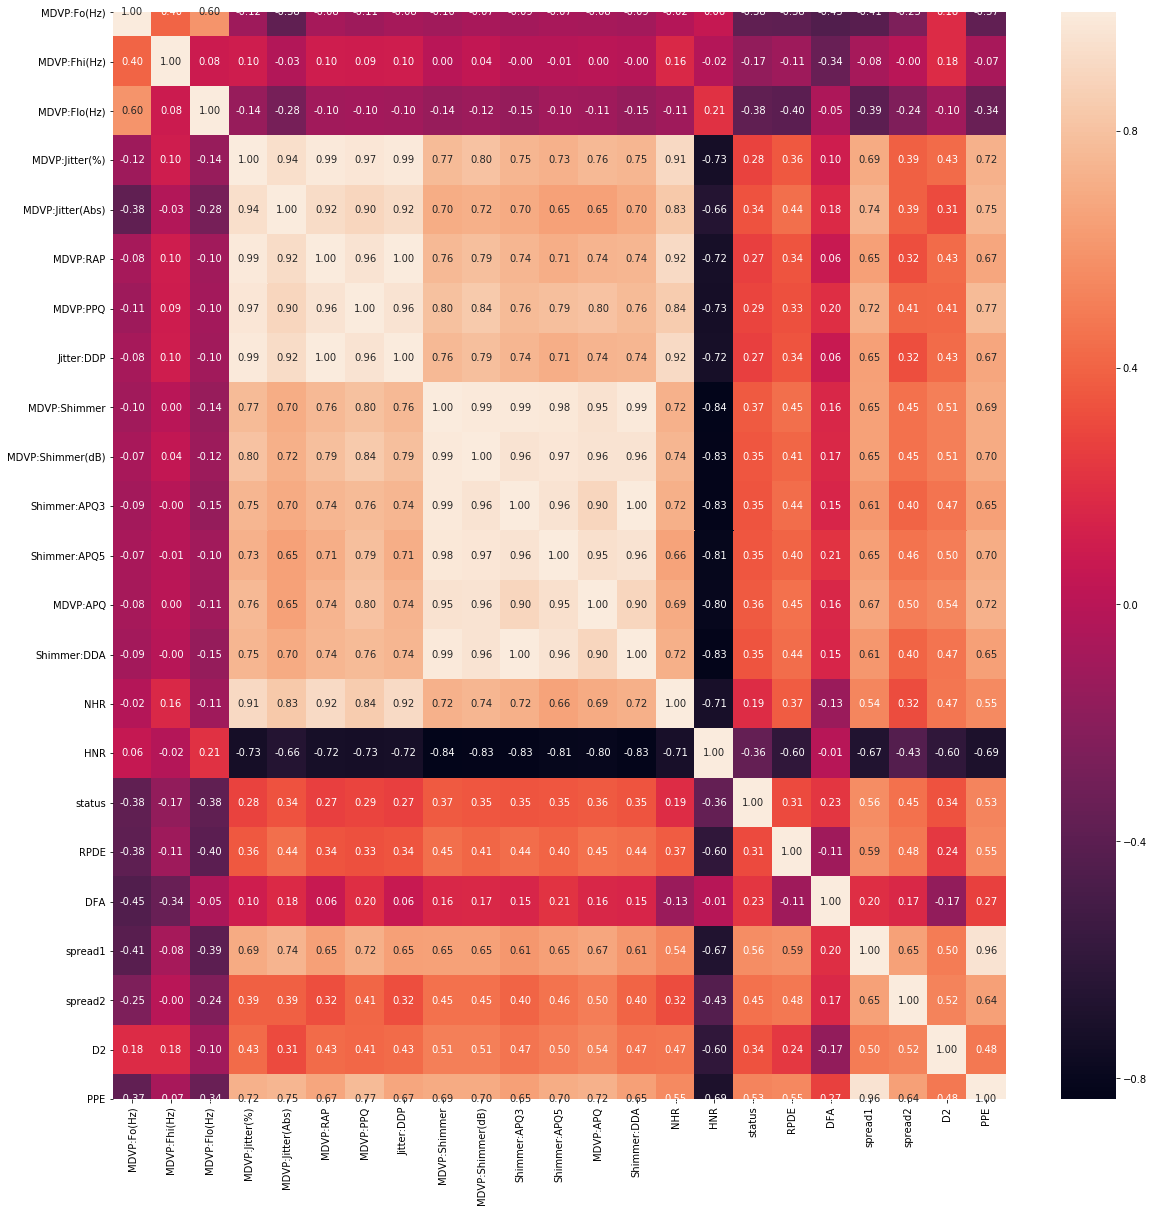

In [177]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(parkinsons_df.corr(), ax=ax,fmt=".2f",annot = True)

Several measures of variation in fundamental frequency i.e. MDVP:Jitter(%),MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP have a high Correlation with each other. 

Similarly, Several measures of variation in amplitude i.e. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP: APQ, Shimmer:DDA have a high Correlation with each other.

HNR and NHR parameters have high Correlation with Several measures of variation in fundamental frequency and with Several measures of variation in amplitude. 

 It is evient from the Correlation Values that many features are higly correlated ( >0.70) and will cause multicollinearity in this model. However, since we have not learnt yet topic of Feature Section and Feature Engineering modules, i am not dropping any feature now

In [178]:
# parkinsons_df
parkinsons_df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left

In [179]:
parkinsons_df.kurtosis()

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

Kurtosis with positive values indicates that those attributes have more data points around the tail

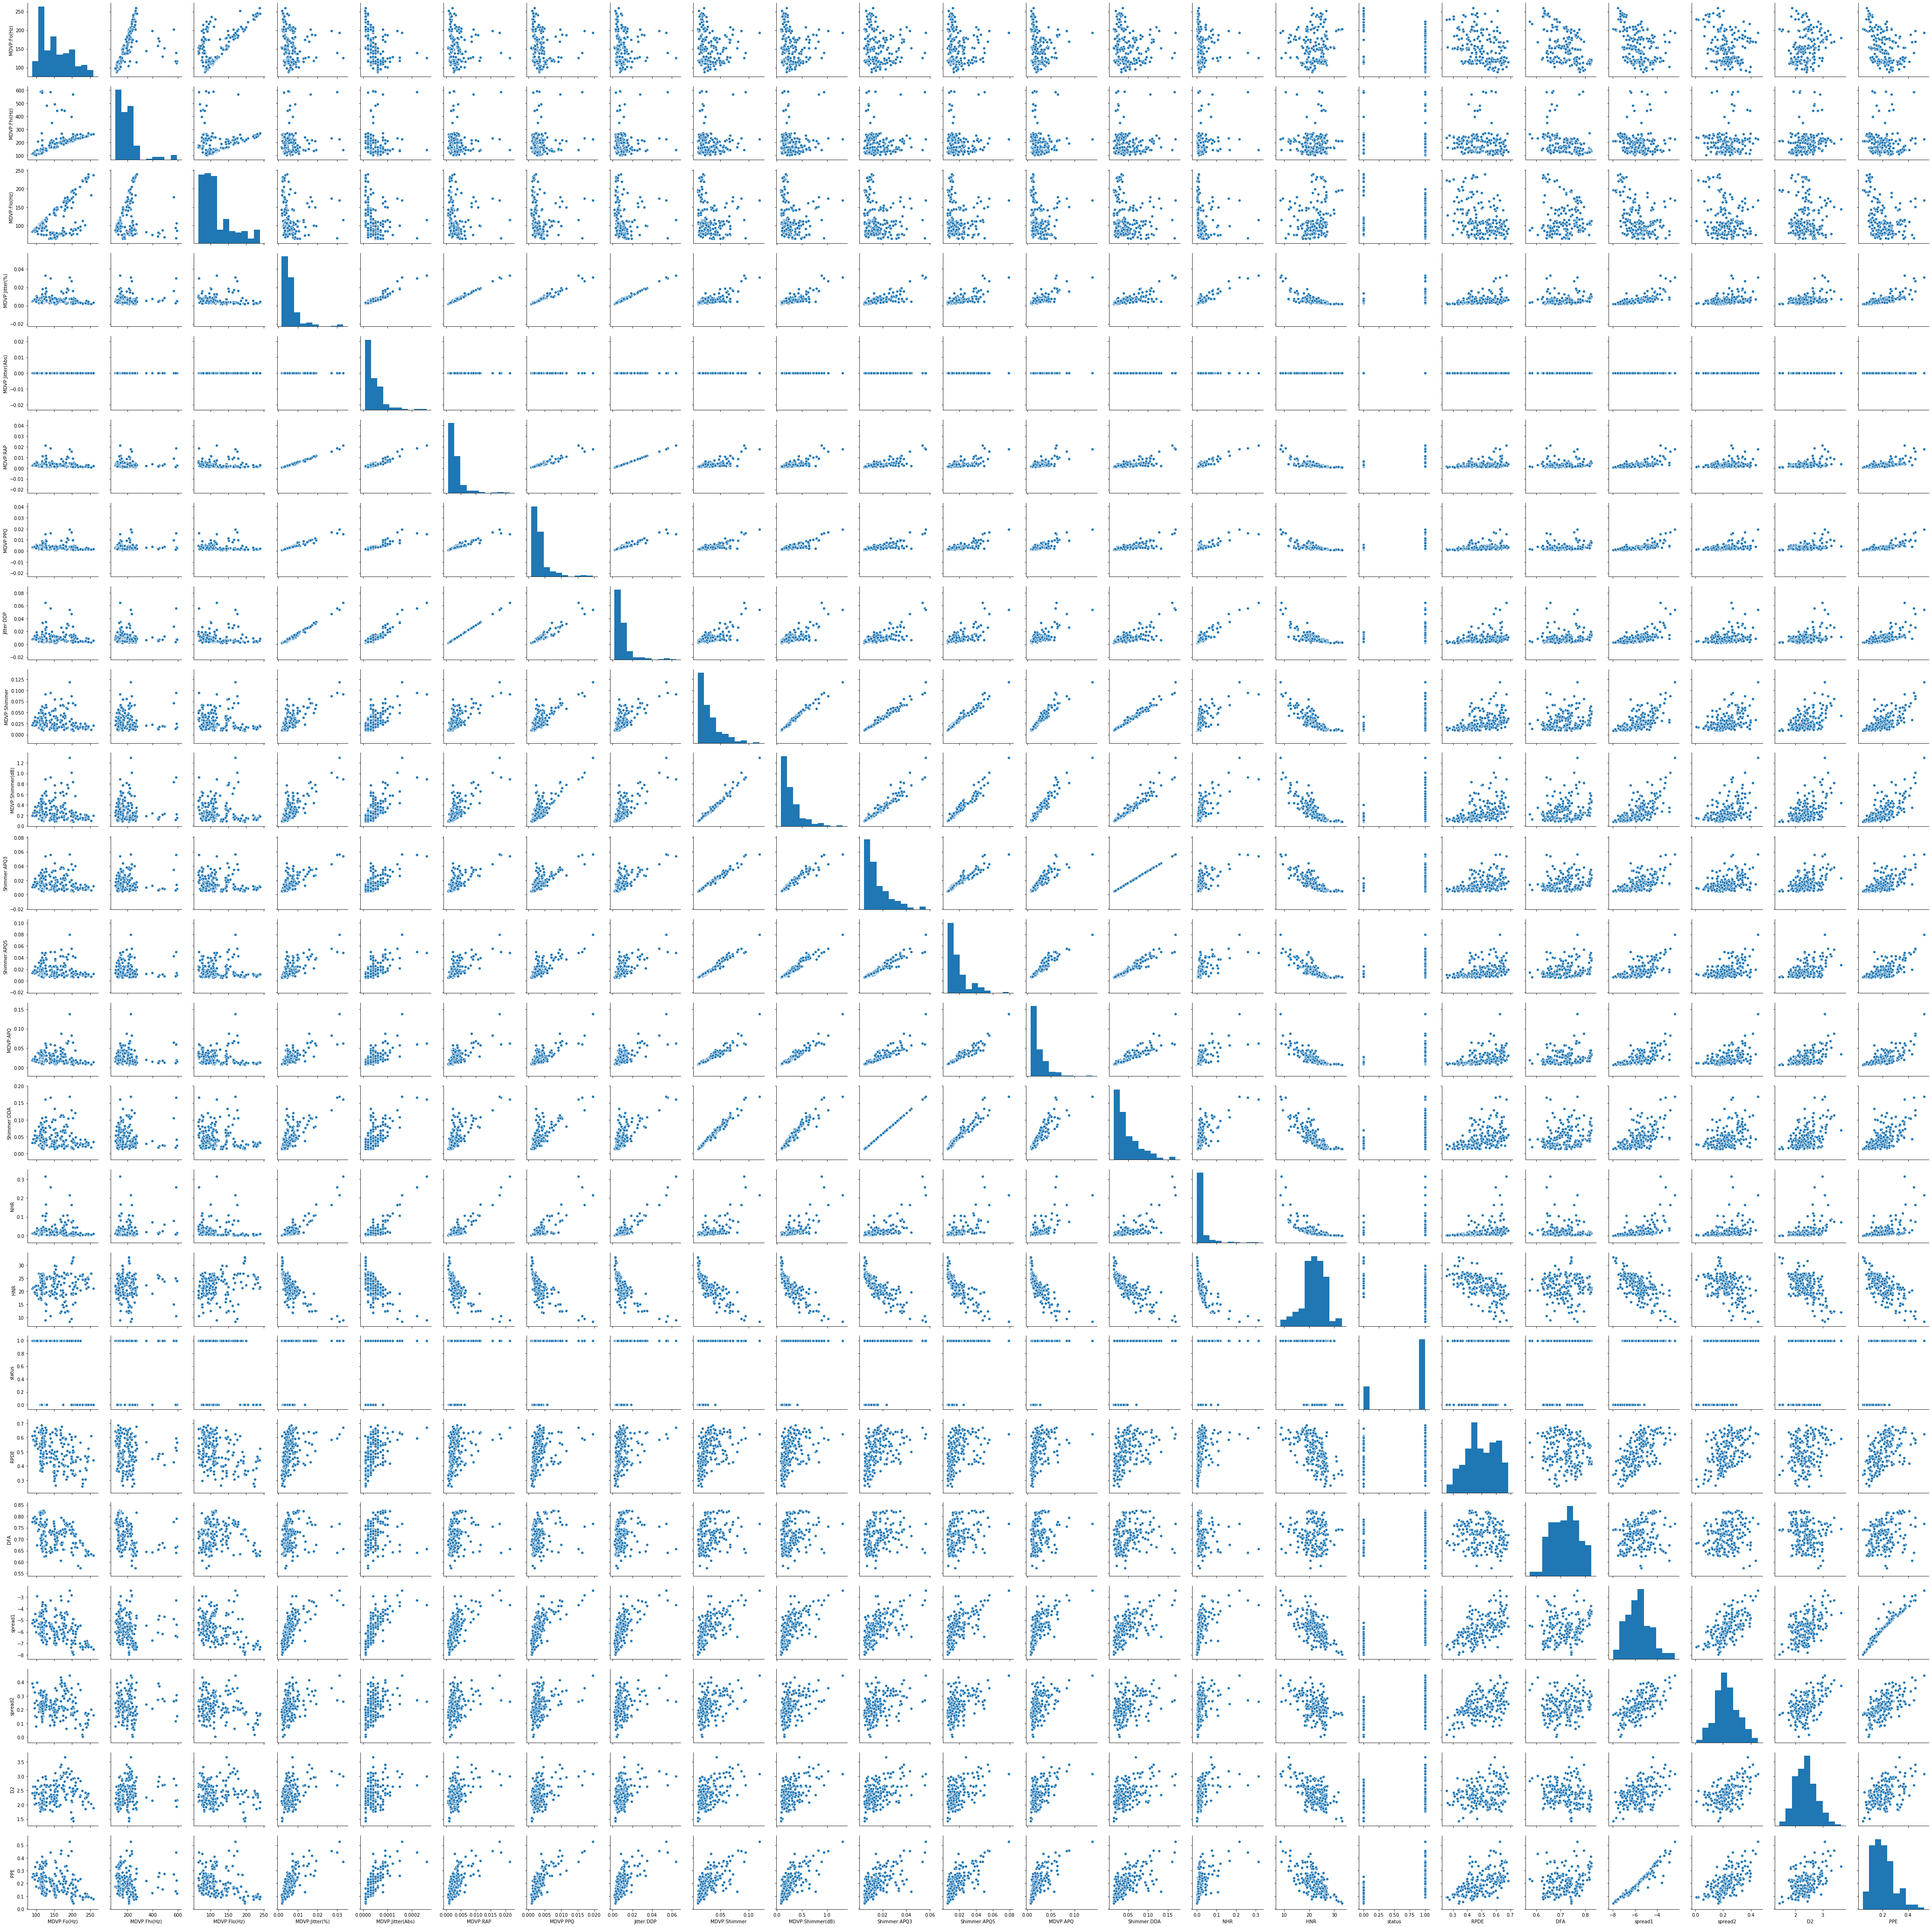

In [180]:
#Pairplot
sns.pairplot(parkinsons_df)

NOTE : 
From above analysis we can conclude that only a few features can help predict the Status accurately without much loss in information. Following seem to be some good parameters for model to detect the status:

- MDVP:Fo(Hz) - Average vocal fundamental frequency

- MDVP:Flo(Hz) - Minimum vocal fundamental frequency

- RPDE,D2 - Two nonlinear dynamical complexity measures

- DFA - Signal fractal scaling exponent

- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### Summary:
About 2/3rd part of our data are having status as 1, the model's ability to predict status 1 will be better than predicting status 0. 

Although there may be high collinearity alomgst multiple parameters, we will not drop any of these as we are using decision tree algorithm which is agnostic to collinearity. Also we do not have sufficient SME knowledge on this dataset to filter out features. We are yet to learn about Feature Selection and Feature Engineering techniques.

In [181]:
# Change 'Status' to categorical column

parkinsons_df['status'] = pd.Categorical(parkinsons_df['status']) # Replace int with category

In [182]:
# dropping name column as it contains Subject and record identification numbers

parkinsons_new = parkinsons_df.drop('name',axis=1)

In [183]:
parkinsons_new

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### We will split the data in TRAIN VALIDATE TEST  sections. 

We will use Train Validate sections to see how our model performs under various learning methods. We will use Test later at the end

In [184]:
# splitting data into Features X and Labels y

X =  parkinsons_new.drop("status", axis=1)
y =  parkinsons_new.pop("status")

In [185]:
# splitting data into training and test set

test_size = 0.30 # taking 70:30 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [186]:
X_train.shape

(136, 22)

In [187]:
X_test.shape

(59, 22)

### I am not going to expose the test data X_test and y_test to my models till the very end. 

### I will split training data to get a validation set that i can use for my model validation purpose.

In [188]:
# splitting training data into training and validation set

test_size = 0.30 # taking 70:30 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)

In [189]:
X_train1.shape

(95, 22)

In [190]:
X_val1.shape

(41, 22)

### DECISION TREE

In [191]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [192]:
dt_model.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [193]:
train_char_label = ['Healthy','PD']

In [194]:
from sklearn import tree
Parkinson_Tree = open('Parkinson_detection_Tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_Tree, feature_names = list(X_train1), class_names = list(train_char_label))
Parkinson_Tree.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train1.columns))

                       Imp
MDVP:Fo(Hz)       0.150846
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.036316
MDVP:Shimmer(dB)  0.186342
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.139563
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.419886
spread2           0.067047
D2                0.000000
PPE               0.000000


Decision Tree model is usinlg only a handful of features. Most of the features have importance of zero.
The Decision Tree generated has a Depth of 5 and Entropy is reduced to Zero at leaf level.

NOTE: You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 

In [195]:
print(dt_model.score(X_train1 , y_train1))

1.0


For Training Data Decision Tree has a Score of 100% as expected

In [196]:
y_predict = dt_model.predict(X_val1)

In [197]:
model_score = dt_model.score(X_val1, y_val1)
print("Model Score : ",model_score)

Model Score :  0.8780487804878049


In [198]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_val1, y_predict))
print(metrics.confusion_matrix(y_val1, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.91      0.94      0.92        32

    accuracy                           0.88        41
   macro avg       0.83      0.80      0.81        41
weighted avg       0.87      0.88      0.88        41

[[ 6  3]
 [ 2 30]]


In [199]:
model_performance = [metrics.accuracy_score(y_val1, y_predict),metrics.recall_score(y_val1, y_predict),
                         metrics.precision_score(y_val1, y_predict),metrics.f1_score(y_val1, y_predict) ]
accuracy_report = pd.DataFrame(model_performance, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report

,Model_Performance
Accuracy,0.878049
Recall,0.937500
Precision,0.909091
f1_Score,0.923077


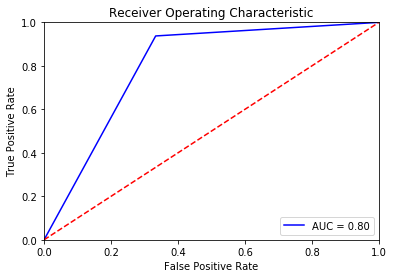

In [200]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = dt_model.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area under the Cureve is 80% Model Accuracy on Validation Set is 88% and Recall of around 94% for Decision Tree.

### Use GridSearchCV to find best Hyperparamaters for Decision Tree

In [209]:
# Import GridSerachCV from SKlearn and provide paramemters and use cross validation
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : range(10,90,10),'max_depth': range(1,30,2), 'criterion':['entropy','gini'], 'max_features': ['auto', 'sqrt', 'log2'],}
clf_tree = DecisionTreeClassifier()
grid = GridSearchCV(clf_tree,parameters,cv= 10) # use cross validation
# fit the grid with data
grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                  

### Use the derived hyperparameters to generate a model

In [210]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9155555555555555
{'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 10}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [214]:
#Create a new DT Model with the derived values of parameters
dt_model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, max_features = 'sqrt', min_samples_split =10)

In [215]:
dt_model1.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [220]:
y_predict1 = dt_model1.predict(X_val1)
model_score1 = dt_model1.score(X_val1, y_val1)
print("Model Score using parameters derived from GridSearch : ",model_score1)

Model Score using parameters derived from GridSearch :  0.926829268292683


In [217]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_val1, y_predict1))
print(metrics.confusion_matrix(y_val1, y_predict1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.97      0.94      0.95        32

    accuracy                           0.93        41
   macro avg       0.88      0.91      0.90        41
weighted avg       0.93      0.93      0.93        41

[[ 8  1]
 [ 2 30]]


In [227]:
model_performance1 = [metrics.accuracy_score(y_val1, y_predict1),metrics.recall_score(y_val1, y_predict1),
                         metrics.precision_score(y_val1, y_predict1),metrics.f1_score(y_val1, y_predict1) ]
accuracy_report1 = pd.DataFrame(model_performance1, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report1

,Model_Performance
Accuracy,0.926829
Recall,0.937500
Precision,0.967742
f1_Score,0.952381


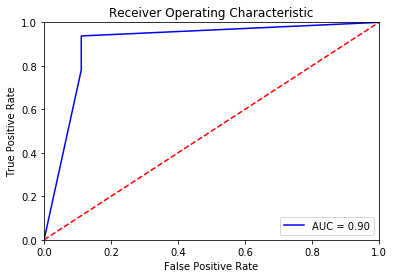

In [228]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = dt_model1.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Area under Curve increased from 80% to 90% after using GridSerachCV. Accuracy and Recall Both ae increased from earlier Decision Tree.

### Ensemble Technique - Random Forest

,Scores,n_estimators
0,0.853659,5
1,0.951220,7
2,0.926829,9
3,0.951220,11
4,0.902439,13
5,0.926829,15
6,0.926829,17
7,0.902439,19
8,0.951220,21
9,0.926829,23


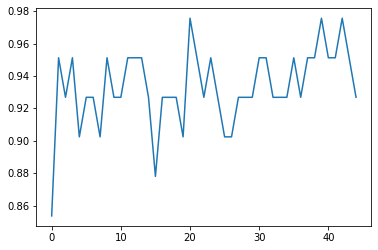

In [121]:
RandomState = np.random.seed(10)
Test_reg_scores = []
n_estimators = []
for i in range(5,95,2):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train1, y_train1)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_val1)
    scores = Test_rfcl.score(X_val1, y_val1)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
plt.plot(Test_reg_scores)

pd.concat([pd.DataFrame(Test_reg_scores, columns = ['Scores']),
               pd.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

Pick a value for n_estimator with highest Score

In [132]:
n= 45
rfcl = RandomForestClassifier(n_estimators = n, random_state=4)
rfcl = rfcl.fit(X_train1, y_train1)
Y_predict_rfcl = rfcl.predict(X_val1)
print("On our Validation set Random Forest Accuracy is :", rfcl.score(X_val1, y_val1))
print(metrics.classification_report(y_val1, Y_predict_rfcl))
print(metrics.confusion_matrix(y_val1, Y_predict_rfcl))

On our Validation set Random Forest Accuracy is : 0.926829268292683
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.91      0.95        32

    accuracy                           0.93        41
   macro avg       0.88      0.95      0.90        41
weighted avg       0.95      0.93      0.93        41

[[ 9  0]
 [ 3 29]]


In [133]:
model_performance_rfcl = [metrics.accuracy_score(y_val1, Y_predict_rfcl),metrics.recall_score(y_val1, Y_predict_rfcl),
                         metrics.precision_score(y_val1, Y_predict_rfcl),metrics.f1_score(y_val1, Y_predict_rfcl) ]
accuracy_report_rfcl = pd.DataFrame(model_performance_rfcl, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_rfcl

,Model_Performance
Accuracy,0.926829
Recall,0.906250
Precision,1.000000
f1_Score,0.950820


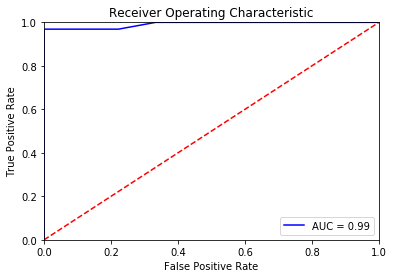

In [134]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = rfcl.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area under the curve is 99% which is very very high. Accuracy is 92.68% and recall is 90.62%

#### Lets look at the current parameters used by Random Forest 

In [135]:
print('Parameters currently in use:\n')
print(rfcl.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 45, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


### Now Lets Apply GridSearchCV on Random Forest with same Hyperparameters derived form GridSearchCV on Decision Trees 

,Scores,n_estimators
0,0.926829,1
1,0.926829,3
2,0.951220,5
3,0.902439,7
4,0.926829,9
5,0.975610,11
6,0.902439,13
7,0.926829,15
8,0.902439,17
9,0.926829,19


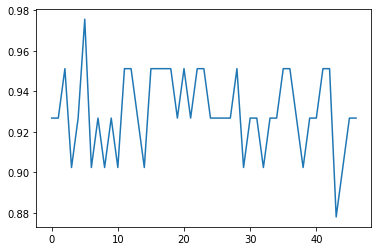

In [222]:
RandomState = np.random.seed(10)
Test_reg_scores1 = []
n_estimators1 = []
for i in range(1,95,2):
    Test_rfcl1 = RandomForestClassifier(n_estimators = i, random_state=RandomState, criterion = 'gini', max_depth = 25, max_features = 'sqrt', min_samples_split =10)
    Test_rfcl1 = Test_rfcl.fit(X_train1, y_train1)
    Test_Y_predict_rfcl1 = Test_rfcl1.predict(X_val1)
    scores = Test_rfcl1.score(X_val1, y_val1)
    Test_reg_scores1.append(scores)
    n_estimators1.append(i)
            
plt.plot(Test_reg_scores1)

pd.concat([pd.DataFrame(Test_reg_scores1, columns = ['Scores']),
               pd.DataFrame(n_estimators1, columns = ['n_estimators'])], axis = 1)

Highest Score is at n = 11

In [225]:
n= 11
RandomState = 4

#rfcl1 = RandomForestClassifier(n_estimators = n, random_state=RandomState, criterion = 'gini', max_depth = 25, max_features = 'sqrt', min_samples_split =10)
rfcl1 = rfcl1.fit(X_train1, y_train1)
Y_predict_rfcl1 = rfcl1.predict(X_val1)

print("On our Validation set Random Forest Accuracy is :", rfcl1.score(X_val1, y_val1))

print(metrics.classification_report(y_val1, Y_predict_rfcl1))
print(metrics.confusion_matrix(y_val1, Y_predict_rfcl1))

On our Validation set Random Forest Accuracy is : 0.8536585365853658
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.81      0.90        32

    accuracy                           0.85        41
   macro avg       0.80      0.91      0.82        41
weighted avg       0.91      0.85      0.86        41

[[ 9  0]
 [ 6 26]]


In [226]:
model_performance_rfcl1 = [metrics.accuracy_score(y_val1, Y_predict_rfcl1),metrics.recall_score(y_val1, Y_predict_rfcl1),
                         metrics.precision_score(y_val1, Y_predict_rfcl1),metrics.f1_score(y_val1, Y_predict_rfcl1) ]
accuracy_report_rfcl1 = pd.DataFrame(model_performance_rfcl1, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_rfcl1

,Model_Performance
Accuracy,0.853659
Recall,0.812500
Precision,1.000000
f1_Score,0.896552


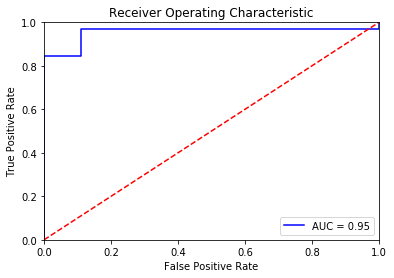

In [224]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = rfcl1.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####  It seems there is no improvement on applying GridSearchCV parameters on Random Forest model. Instead Acuracy Recall AUC all reduced.

### Bagging

In [234]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=11)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train1, y_train1)

In [235]:
Y_predict_bgcl = bgcl.predict(X_val1)
Y_predict_bgcl

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [236]:
print(bgcl.score(X_train1 , y_train1))
print(bgcl.score(X_val1, y_val1))
print(metrics.classification_report(y_val1, Y_predict_bgcl))
print(metrics.confusion_matrix(y_val1, Y_predict_bgcl))

1.0
0.9512195121951219
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.94      0.97        32

    accuracy                           0.95        41
   macro avg       0.91      0.97      0.93        41
weighted avg       0.96      0.95      0.95        41

[[ 9  0]
 [ 2 30]]


In [237]:
model_performance_bgcl = [metrics.accuracy_score(y_val1, Y_predict_bgcl),metrics.recall_score(y_val1, Y_predict_bgcl),
                         metrics.precision_score(y_val1, Y_predict_bgcl),metrics.f1_score(y_val1, Y_predict_bgcl) ]
accuracy_report_bgcl = pd.DataFrame(model_performance_bgcl, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_bgcl

,Model_Performance
Accuracy,0.951220
Recall,0.937500
Precision,1.000000
f1_Score,0.967742


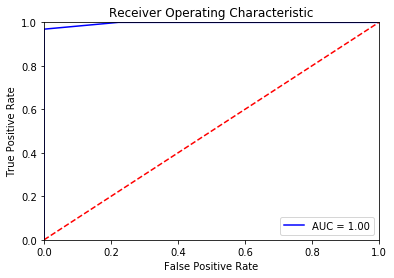

In [238]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = bgcl.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Bagging is giving Area Under Curve of 100% . Accuracy is 95% and Recall of 94%

### Ada Boost

In [243]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=11)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train1, y_train1)

In [244]:
y_predict_Abcl = abcl.predict(X_val1)
y_predict_Abcl

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [245]:
print(abcl.score(X_train1 , y_train1))
print(abcl.score(X_val1, y_val1))
print(metrics.classification_report(y_val1, y_predict_Abcl))
print(metrics.confusion_matrix(y_val1, y_predict_Abcl))

1.0
0.9024390243902439
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.97      0.91      0.94        32

    accuracy                           0.90        41
   macro avg       0.85      0.90      0.87        41
weighted avg       0.91      0.90      0.91        41

[[ 8  1]
 [ 3 29]]


In [246]:
model_performance_Abcl = [metrics.accuracy_score(y_val1, y_predict_Abcl),metrics.recall_score(y_val1, y_predict_Abcl),
                         metrics.precision_score(y_val1, y_predict_Abcl),metrics.f1_score(y_val1, y_predict_Abcl) ]
accuracy_report_Abcl = pd.DataFrame(model_performance_Abcl, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_Abcl

,Model_Performance
Accuracy,0.902439
Recall,0.906250
Precision,0.966667
f1_Score,0.935484


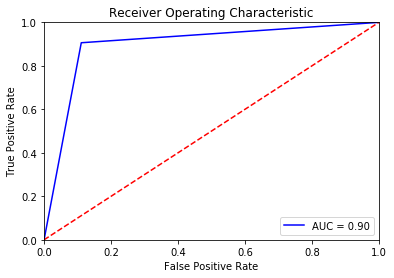

In [247]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = abcl.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Ada Boost is providing AUC of 90% with Accuracy of 90% and Recall of 90%

### Gradient Boosting

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 11, learning_rate=0.1)
gbcl = gbcl.fit(X_train1, y_train1)

In [251]:
y_predict_gbcl = gbcl.predict(X_val1)
y_predict_gbcl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [252]:
print(gbcl.score(X_train1, y_train1))
print(gbcl.score(X_val1, y_val1))
print(metrics.classification_report(y_val1, y_predict_gbcl))
print(metrics.confusion_matrix(y_val1, y_predict_gbcl))

0.9894736842105263
0.926829268292683
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.97      0.94      0.95        32

    accuracy                           0.93        41
   macro avg       0.88      0.91      0.90        41
weighted avg       0.93      0.93      0.93        41

[[ 8  1]
 [ 2 30]]


In [253]:
model_performance_gbcl = [metrics.accuracy_score(y_val1, y_predict_gbcl),metrics.recall_score(y_val1, y_predict_gbcl),
                         metrics.precision_score(y_val1, y_predict_gbcl),metrics.f1_score(y_val1, y_predict_gbcl) ]
accuracy_report_gbcl = pd.DataFrame(model_performance_gbcl, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_gbcl

,Model_Performance
Accuracy,0.926829
Recall,0.937500
Precision,0.967742
f1_Score,0.952381


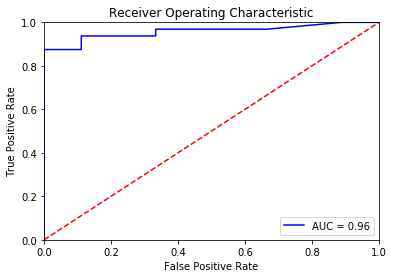

In [254]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = gbcl.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Gradient Boosting is giving AUC of 96% with Accuracy of 92.68% and Recall of 93.75%

### Stacking

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

In [256]:
estimators = [('rf', RandomForestClassifier(n_estimators=75)),('logistic', LogisticRegression())]
stackingclf = VotingClassifier(estimators=estimators, voting='soft')

In [257]:
stackingclf.fit(X_train1,y_train1)

/Users/prabirchakraborty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [258]:
y_predict_stck = stackingclf.predict(X_val1)

In [259]:
y_predict_stck

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [260]:
print(stackingclf.score(X_train1, y_train1))
print(stackingclf.score(X_val1, y_val1))
print(metrics.classification_report(y_val1, y_predict_stck))
print(metrics.confusion_matrix(y_val1, y_predict_stck))

0.968421052631579
0.9024390243902439
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.97      0.91      0.94        32

    accuracy                           0.90        41
   macro avg       0.85      0.90      0.87        41
weighted avg       0.91      0.90      0.91        41

[[ 8  1]
 [ 3 29]]


In [261]:
model_performance_stck = [metrics.accuracy_score(y_val1, y_predict_stck),metrics.recall_score(y_val1, y_predict_stck),
                         metrics.precision_score(y_val1, y_predict_stck),metrics.f1_score(y_val1, y_predict_stck) ]
accuracy_report_stck = pd.DataFrame(model_performance_stck, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_stck

,Model_Performance
Accuracy,0.902439
Recall,0.906250
Precision,0.966667
f1_Score,0.935484


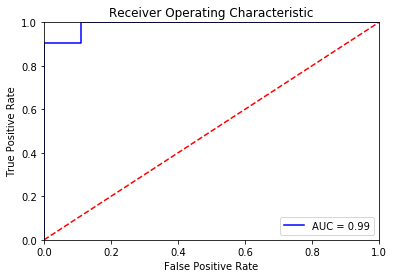

In [262]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = stackingclf.predict_proba(X_val1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val1, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Stacking is providing AUC of 99% . Accuracy and Recall are both around 90%

## Evaluate Mocel On Test Set

### Finally after all the above analysis i will pick Gradient Boosting  Calssifier as my final model and use it on my Test Set as this model gave me highest Accuracy Recall and Area Under Curve

#### I will Train my selected model on complete TRAIN Data and Test out of TEST Data hat i had kept aside

In [263]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl1 = GradientBoostingClassifier(n_estimators = 11, learning_rate=0.1)
gbcl1 = gbcl.fit(X_train, y_train)

In [264]:
y_predict_gbcl1 = gbcl.predict(X_test)
y_predict_gbcl1

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [265]:
print(gbcl1.score(X_train, y_train))
print(gbcl1.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predict_gbcl1))
print(metrics.confusion_matrix(y_test, y_predict_gbcl1))

0.9852941176470589
0.7796610169491526
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.81      0.91      0.86        43

    accuracy                           0.78        59
   macro avg       0.72      0.67      0.69        59
weighted avg       0.76      0.78      0.77        59

[[ 7  9]
 [ 4 39]]


In [266]:
model_performance_gbcl1 = [metrics.accuracy_score(y_test, y_predict_gbcl1),metrics.recall_score(y_test, y_predict_gbcl1),
                         metrics.precision_score(y_test, y_predict_gbcl1),metrics.f1_score(y_test, y_predict_gbcl1) ]
accuracy_report_gbcl1 = pd.DataFrame(model_performance_gbcl1, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_gbcl1

,Model_Performance
Accuracy,0.779661
Recall,0.906977
Precision,0.812500
f1_Score,0.857143


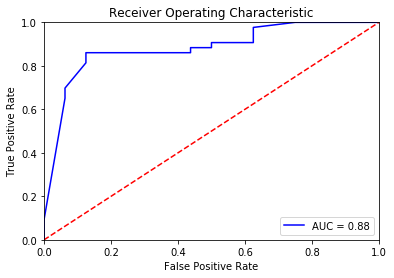

In [267]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = gbcl1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### On our Final Model using Gradient Boosting on Test Data , Area under the curve is 88% Accuracy is 78% and Recall is 71%

#### These numbers are less than our Training Models. We can not convinciengly tell if this model is  good. We will need to observe how it performs in production. But from the numbers it can be concluded that we can find a better model by tweaking the hyperparameters and proper feature selection.

### END OF ASSIGNMENT